In [1]:
import pandas as pd
import numpy as np

In [2]:
print("py3.8 anaconda base")

py3.8 anaconda base


In [3]:
df = pd.read_csv('C:/Users/niuser01/OneDrive - postech.ac.kr/1_2021-2/Research/해오름동맹/원전 포함 민원/중복제거/nuclear_unique.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,제목,본문,민원발생지,성별,나이,year,type
0,0,0,0,불법 파견 및 불법파견 아웃소싱,인천시 남동구 남촌동에 위치한 송현테크(자동차 오디오부품제조)에서 근무중\r\n몇가...,인천광역시,NaN,NaN,2018,일반
1,1,36,37,M버스 인천터미널-서창2지구-강남역삼,수고많으십니다~\r\n강남가는길이 멀고도 험한 서창2지구에서 출퇴근하기 너무 힘이듭...,인천광역시,NaN,NaN,2018,일반
2,2,44,45,대진침대 후레쉬드림 프레쉬드림 Fresh Dream 매트리스 관련건 문의,원자력 안전위원회의 보도자료를 보면 아래와 같이 되어 있습니다.\r\n\r\n※ 2...,인천광역시,NaN,NaN,2018,일반
3,3,193,203,2017년 12월 민원취하이후,"2717년 민원\r\n-내가 아스퍼거증후군,조현병 판정받아서 정신장애인 2번이나 신...",인천광역시,NaN,NaN,2018,일반
4,4,236,248,월드컵 응원을 아시아드경기장에서 해 주세요,오늘부터 월드컵이 시작됩니다.\n서구민으로 월드컵의 열기를 하나로 만들고\n지방선거...,인천광역시,NaN,NaN,2018,일반
...,...,...,...,...,...,...,...,...,...,...
9861,77,19234,36410,악취 민원,대전 유성구 가정동 원자력안전기술원 천변에서 악취가 심합니다.&#x28;국제원자력안...,세종특별자치시,NaN,NaN,2021,일반
9862,78,19254,36492,너무화가 납니다.,- 지난 월요일&#x28;3월8일&#x29; 오후시간이었습니다. 궁금한 사항이 있어...,세종특별자치시,NaN,NaN,2021,일반
9863,79,19615,38769,입찰시 자료 열람관련 시공사 책임의 범위 및 한계,1. 개요\r\n - 공사명: 경수로원전연료서형가공시설 증설공사\r\n - 계약유...,세종특별자치시,NaN,NaN,2021,일반
9864,80,19671,38890,설계서 해석에 관한 발주처 시공사간 이견,1. 공사개요\r\n- 공사명: 경수로원전연료성형가공시설 증설공사\r\n- 계약형태...,세종특별자치시,NaN,NaN,2021,일반


In [5]:
from konlpy.tag import Okt

In [6]:
okt = Okt()

In [7]:
body = df['본문']

tok = []
for txt in body:
    tok.append(okt.nouns(str(txt)))

In [8]:
from gensim.models import FastText

C:\Users\niuser01\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [9]:
model = FastText(tok, window=6, min_count=5, workers=4, sg=1)

In [11]:
model.wv.most_similar("원전", topn = 15)

[('탈', 0.7122010588645935),
 ('폐쇄해', 0.650205671787262),
 ('페기', 0.6241288185119629),
 ('전폐', 0.6137426495552063),
 ('원자력발전', 0.6093851327896118),
 ('핵발전소', 0.6078061461448669),
 ('울진원전', 0.6072636842727661),
 ('후쿠시마현', 0.5928373336791992),
 ('여파', 0.5908066034317017),
 ('격납건물', 0.5825706720352173),
 ('포화상태', 0.580938994884491),
 ('중일', 0.5773591995239258),
 ('탈핵', 0.5772840976715088),
 ('후쿠시마', 0.5763036608695984),
 ('취성', 0.5724465250968933)]

In [12]:
model.save('ft_nuclear')

In [13]:
model.wv.most_similar(['한수원', '월성'])

[('수명연장', 0.7882021069526672),
 ('한울원전', 0.7841479182243347),
 ('호기', 0.7777765989303589),
 ('한울', 0.7742968797683716),
 ('월성원자력발전소', 0.7727512717247009),
 ('한울원자력발전소', 0.7655277252197266),
 ('월성원전', 0.7571820616722107),
 ('신고리', 0.7453116774559021),
 ('고리', 0.7231485843658447),
 ('한빛', 0.7225419878959656)]

In [14]:
sent_vect_lst = []
for i in range(len(tok)):
    sent_vect = np.zeros(100)
    for token in tok[i]:
        sent_vect += model.wv[token]
    sent_vect_lst.append(sent_vect)

In [15]:
from sklearn.manifold import TSNE


In [16]:
tsne_model = TSNE(2)

In [17]:
tsne_vect = tsne_model.fit_transform(sent_vect_lst)

In [18]:
import matplotlib.pyplot as plt

In [19]:
tsne_df = pd.DataFrame(tsne_vect)
tsne_df

,0,1
0,6.344449,4.442893
1,50.409786,-34.393852
2,-46.883171,-54.637238
3,12.935930,59.026890
4,40.143726,-22.011776
...,...,...
9861,43.498837,-43.181339
9862,8.589428,51.181301
9863,-47.160973,16.641319
9864,-49.296070,17.283674


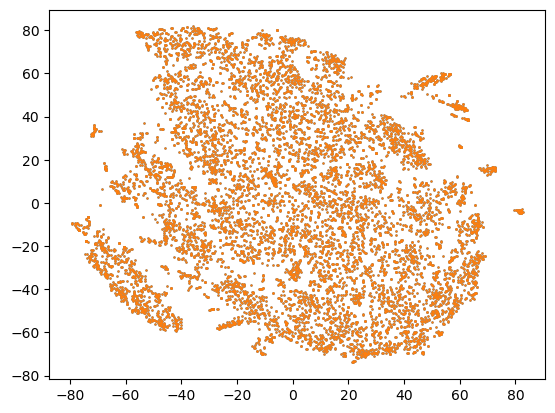

In [21]:
plt.scatter(tsne_df[0], tsne_df[1], s = 0.5)

plt.show()

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
def similarity_matrix(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(len(sentence_embedding)):
            sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, 100),
                                              sentence_embedding[j].reshape(1, 100))[0,0]
    return sim_mat

In [25]:
def similarity_matrix2(sentence_embedding):
    sim_mat = np.zeros([len(sentence_embedding), len(sentence_embedding)])
    for i in range(len(sentence_embedding)):
        for j in range(i, len(sentence_embedding)):
            if i > j: 
                sim_mat[i][j] = cosine_similarity(sentence_embedding[i].reshape(1, 100),
                                                sentence_embedding[j].reshape(1, 100))[0,0]
            elif i == j:
                sim_mat[i][j] = 1
            else:
                sim_mat[j][i] = sim_mat[i][j] 
    return sim_mat

In [26]:
sim_temp = similarity_matrix(sent_vect_lst)

KeyboardInterrupt: 

In [161]:
sim_df = pd.DataFrame(sim_temp)
sim_idx = []
for i in range(len(sim_df)):
    sim_idx.append(sim_df[i].sort_values(ascending=False)[1:4].index)

In [172]:
import sys
f = open('nuclear_ft_doc_sim.txt', 'w')

for i in range(len(sim_idx)):
    print("원문 ::::", df.iloc[i].본문, file = f)
    for j in sim_idx[i]:   
        print('----------------------------------', file = f)
        print("유사 문서 :::",  df.iloc[j].본문, file = f)
    print("======================================", file = f)
    
f.close()